Importing all the modules

In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


Specifying the Date

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day)

Collecting the Data set

In [3]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM500188', 'quandl', start=start, end=end )['Close'])    #Hind_Zinc

In [4]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM513599', 'quandl', start=start, end=end )['Close'])    #Hind_Copper

In [5]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM504966', 'quandl', start=start, end=end )['Close'])    #Tinplate

In [6]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM533282', 'quandl', start=start, end=end )['Close'])    #Gravita_India

In [7]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM523539', 'quandl', start=start, end=end )['Close'])    #Precision_Wires

Renaming the close columns

In [8]:
Hind_Zinc = com_df1.rename(columns={'Close':'Hind_Zinc'})
Hind_Copper = com_df2.rename(columns={'Close':'Hind_Copper'})
Tinplate = com_df3.rename(columns={'Close':'Tinplate'})
Gravita_India = com_df4.rename(columns={'Close':'Gravita_India'})
Precision_Wires = com_df5.rename(columns={'Close':'Precision_Wires'})

Joinig all the data frames

In [9]:
close_df = (((Hind_Zinc.join(Hind_Copper, how="outer")).join(Tinplate, how="outer")).join(Gravita_India, how="outer")).join(Precision_Wires,how="outer")

In [10]:
close_df

,Hind_Zinc,Hind_Copper,Tinplate,Gravita_India,Precision_Wires
Date,,,,,
2018-08-14,285.15,61.50,173.45,144.95,240.50
2018-08-13,287.30,62.80,172.55,147.05,231.35
2018-08-10,286.50,64.65,177.55,150.85,237.90
2018-08-09,287.70,63.85,185.15,146.50,237.75
2018-08-08,288.50,62.90,184.10,145.40,238.20
2018-08-07,285.65,63.25,186.10,148.70,240.75
2018-08-06,285.90,63.80,179.70,143.80,246.75
2018-08-03,282.40,63.80,185.65,148.25,237.65
2018-08-02,281.10,64.85,186.05,151.00,237.90


In [11]:
import seaborn as sns
sns.set_style('whitegrid')

In [12]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,Hind_Zinc,Hind_Copper,Tinplate,Gravita_India,Precision_Wires
Date,,,,,
2018-08-14,NaN,NaN,NaN,NaN,NaN
2018-08-13,0.007540,0.021138,-0.005189,0.014488,-0.038046
2018-08-10,-0.002785,0.029459,0.028977,0.025842,0.028312
2018-08-09,0.004188,-0.012374,0.042805,-0.028837,-0.000631
2018-08-08,0.002781,-0.014879,-0.005671,-0.007509,0.001893


# Pair Plotting

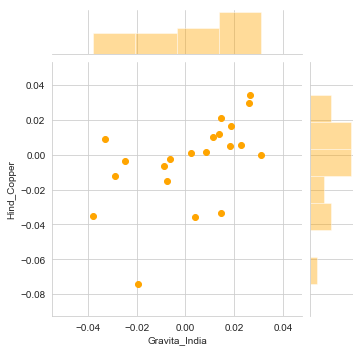

In [13]:
sns.jointplot('Gravita_India','Hind_Copper',rets, kind='scatter',height=5, color='orange')

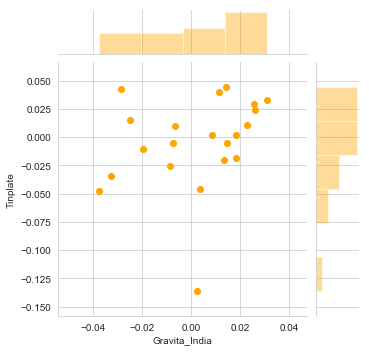

In [15]:
sns.jointplot('Gravita_India','Tinplate',rets, kind='scatter',height=5, color='orange')

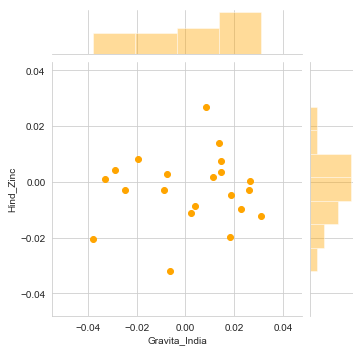

In [16]:
sns.jointplot('Gravita_India','Hind_Zinc',rets, kind='scatter',height=5, color='orange')

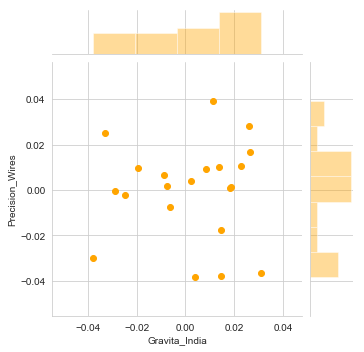

In [17]:
sns.jointplot('Gravita_India','Precision_Wires',rets, kind='scatter',height=5, color='orange')

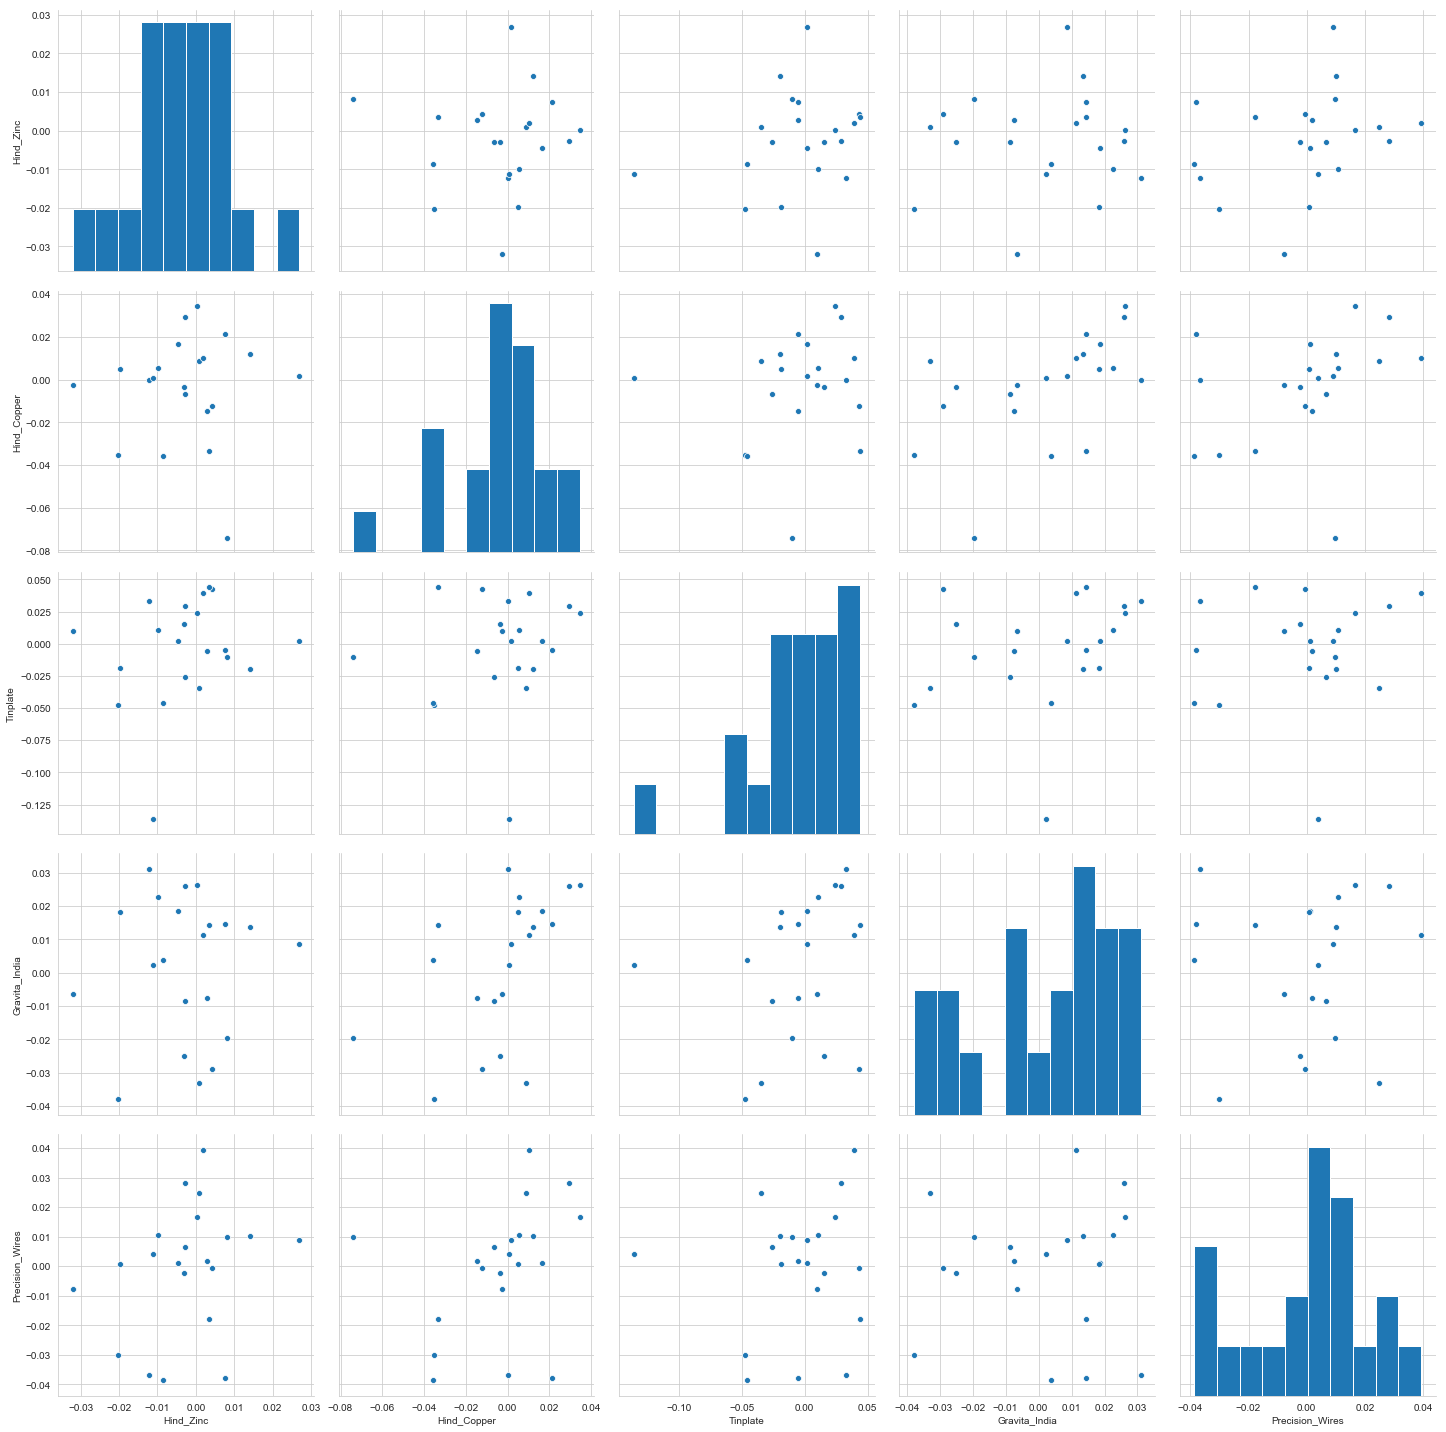

In [18]:
sns.pairplot(rets.dropna(),height=4)

# Correlation Matrix

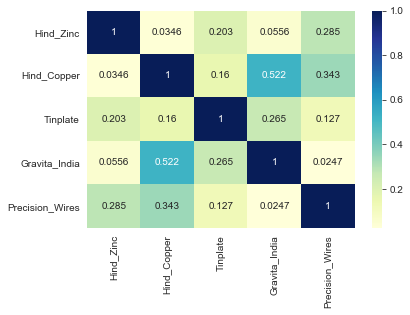

In [19]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

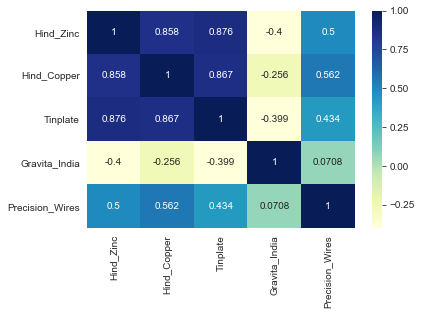

In [20]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

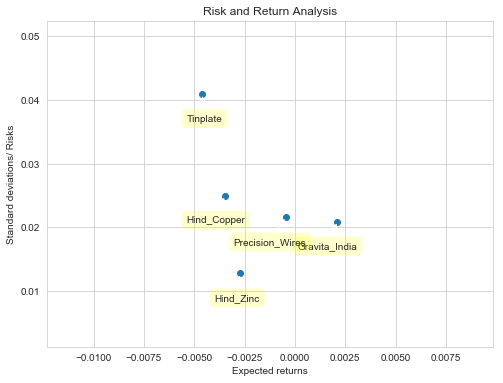

In [22]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [23]:
import numpy as np
import statsmodels.api as sm
X=close_df[['Hind_Copper','Tinplate','Hind_Zinc','Precision_Wires']]
X = sm.add_constant(X)
y=close_df['Gravita_India']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Gravita_India   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     1.720
Date:                Wed, 15 Aug 2018   Prob (F-statistic):              0.192
Time:                        12:35:32   Log-Likelihood:                -50.001
No. Observations:                  22   AIC:                             110.0
Df Residuals:                      17   BIC:                             115.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             162.0043     38.646      4.192      0.001      80.468     243.540
Hind_Copper         0.2656      0.373      0.711      0.486      -0.522       1.053
Tinplate           -0.0723      0.095     -0.764      0.455      -0.272       0.127
Hind_Zinc          -0.1922      0.175     -1.099      0.287      -0.561       0.177
Precision_Wires     0.1545      0.130      1.186      0.252      -0.120       0.429
==============================================================================
Omnibus:                        0.313   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.277
Skew:                          -0.230   Prob(JB):                        0.871
Kurtosis:                       2.698   Cond. No.                     2.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

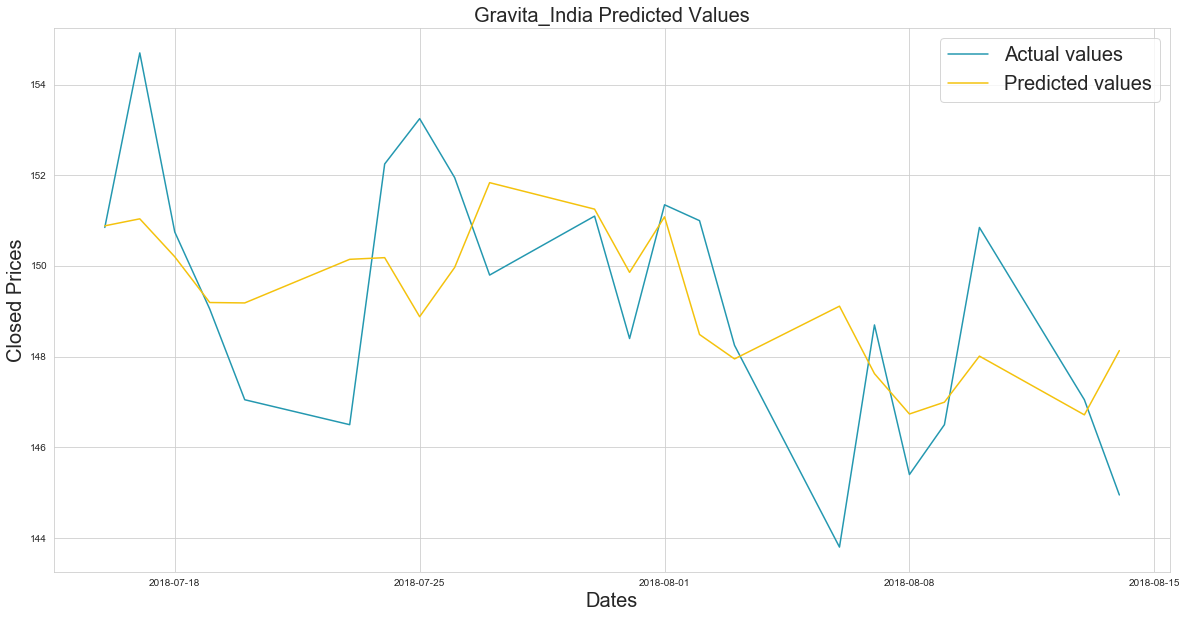

In [24]:
fig, ax = pt.subplots(figsize=(20,10))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates',size=20)
ax.set_ylabel('Closed Prices',size=20)
ax.set_title('Gravita_India Predicted Values',size=20)
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.legend(prop={'size':20})